In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Create a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(19680801)

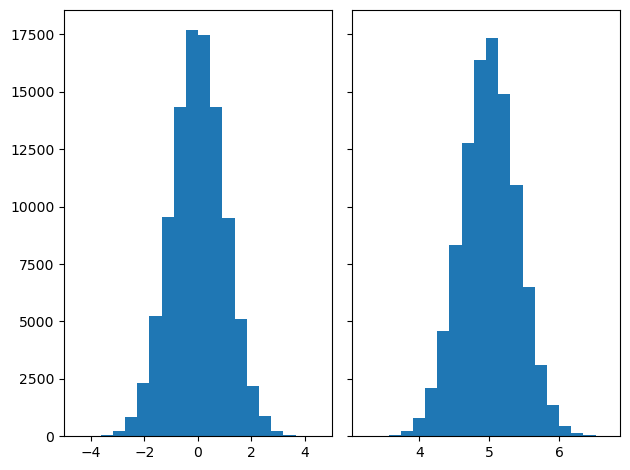

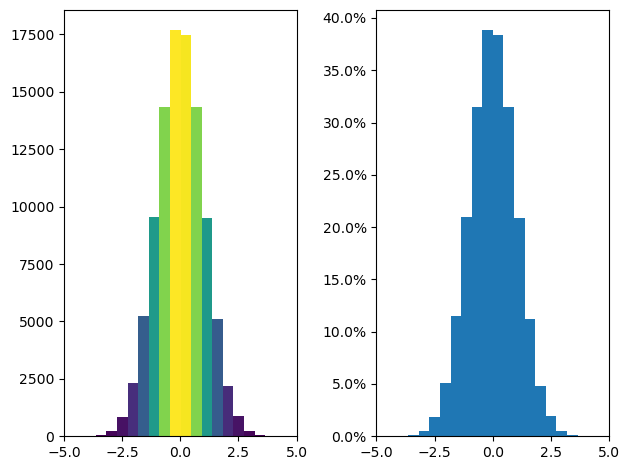

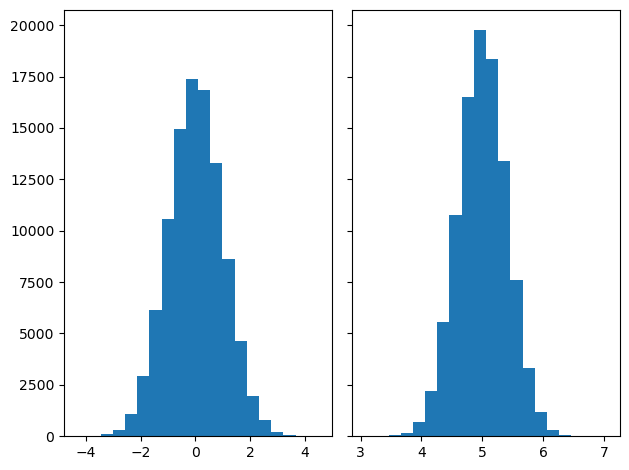

In [5]:
N_points = 100000
n_bins = 20

# Generate two normal distributions
dist1 = rng.standard_normal(N_points)
dist2 = 0.4 * rng.standard_normal(N_points) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist2, bins=n_bins)
plt.show()

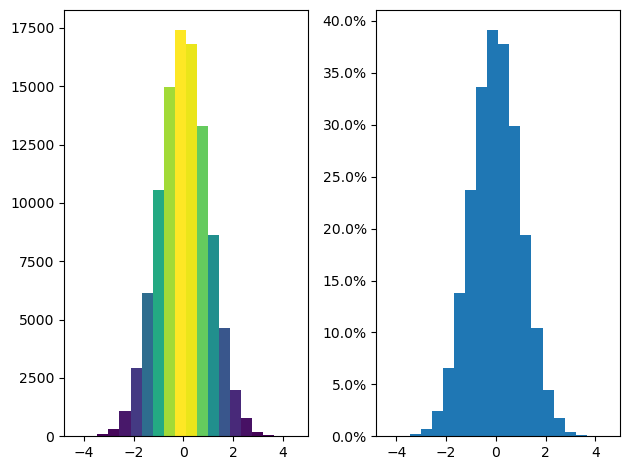

In [6]:
fig, axs = plt.subplots(1, 2, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(dist1, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(dist1, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.show()

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('draft_nba_data_2000_2016_w_PIE_and_salaries_and college_stats.csv')
df = df[['PLAYER_ID','PLAYER_NAME_x', 'POSITION_x', 'PIE_5_YR', '5th_YR_SALARY', '5th_YR_SALARY_TAG']]
df = df[df['5th_YR_SALARY_TAG'] != "no contract"]
display(df)

df1 = pd.read_csv('/Users/josephhartono/Documents/GitHub/NBA-Draft-Biola-Summer-Research/overall_draft_pick_data')


    

,PLAYER_ID,PLAYER_NAME_x,POSITION_x,PIE_5_YR,5th_YR_SALARY,5th_YR_SALARY_TAG
0,2037,Jamal Crawford,PG-SG,9.7,5760000,above average
2,2217,Brendan Haywood,C,5.0,4000000,average
3,2210,Richard Jefferson,SF,14.5,10200000,near max
4,2207,Joe Johnson,SF-SG,12.5,12000000,near max
5,2202,Jason Richardson,SF-SG,12.4,8888888,near max
...,...,...,...,...,...,...
232,203156,Henry Sims,C-PF,0.0,75000,minimum
233,203096,Jared Sullinger,PF,2.7,5628000,above average
236,203138,Hollis Thompson,SF,5.8,442126,minimum
237,203100,Tony Wroten,PG,0.0,25000,minimum


In [68]:
df = df[df['PLAYER_ID'] != 2501]
df = df[df['PLAYER_ID'] != 2617]
df = df[df['PLAYER_ID'] != 101198]
df = df[df['PLAYER_ID'] != 101179]
df = df[df['PLAYER_ID'] != 200811]
df = df[df['PLAYER_ID'] != 201229]
df = df[df['PLAYER_ID'] != 203156]
df = df[df['PLAYER_ID'] != 203138]
df = df[df['PLAYER_ID'] != 2457]
df = df[df['PLAYER_ID'] != 202399]


In [71]:
overall_pick = []
for id_ in df['PLAYER_ID']:
    
    player = df1[df1['PERSON_ID'] == id_]
    player = player.head(1)
    overall = player['OVERALL_PICK']
    overall = overall.values
    overall = overall[0]
    overall_pick.append(overall)
    
df['overall'] = overall_pick
    


In [74]:
graph_data = df[['PIE_5_YR', '5th_YR_SALARY_TAG','overall']]
graph_data = graph_data.rename(columns={"overall":"x"})
graph_data = graph_data.rename(columns={"PIE_5_YR":"y"})
graph_data = graph_data.rename(columns={"5th_YR_SALARY_TAG":"z"})

In [75]:
graph_data

,y,z,x
0,9.7,above average,8
2,5.0,average,20
3,14.5,near max,13
4,12.5,near max,10
5,12.4,near max,5
...,...,...,...
230,7.8,near max,8
231,5.8,average,43
233,2.7,above average,21
237,0.0,minimum,25


In [77]:
groups = graph_data.groupby('z')
plt.figure(dpi=300)
for name, group in groups:
    plt.plot(group.x, group.y, marker='o', linestyle='', markersize=4, label=name)

<Figure size 1920x1440 with 0 Axes>

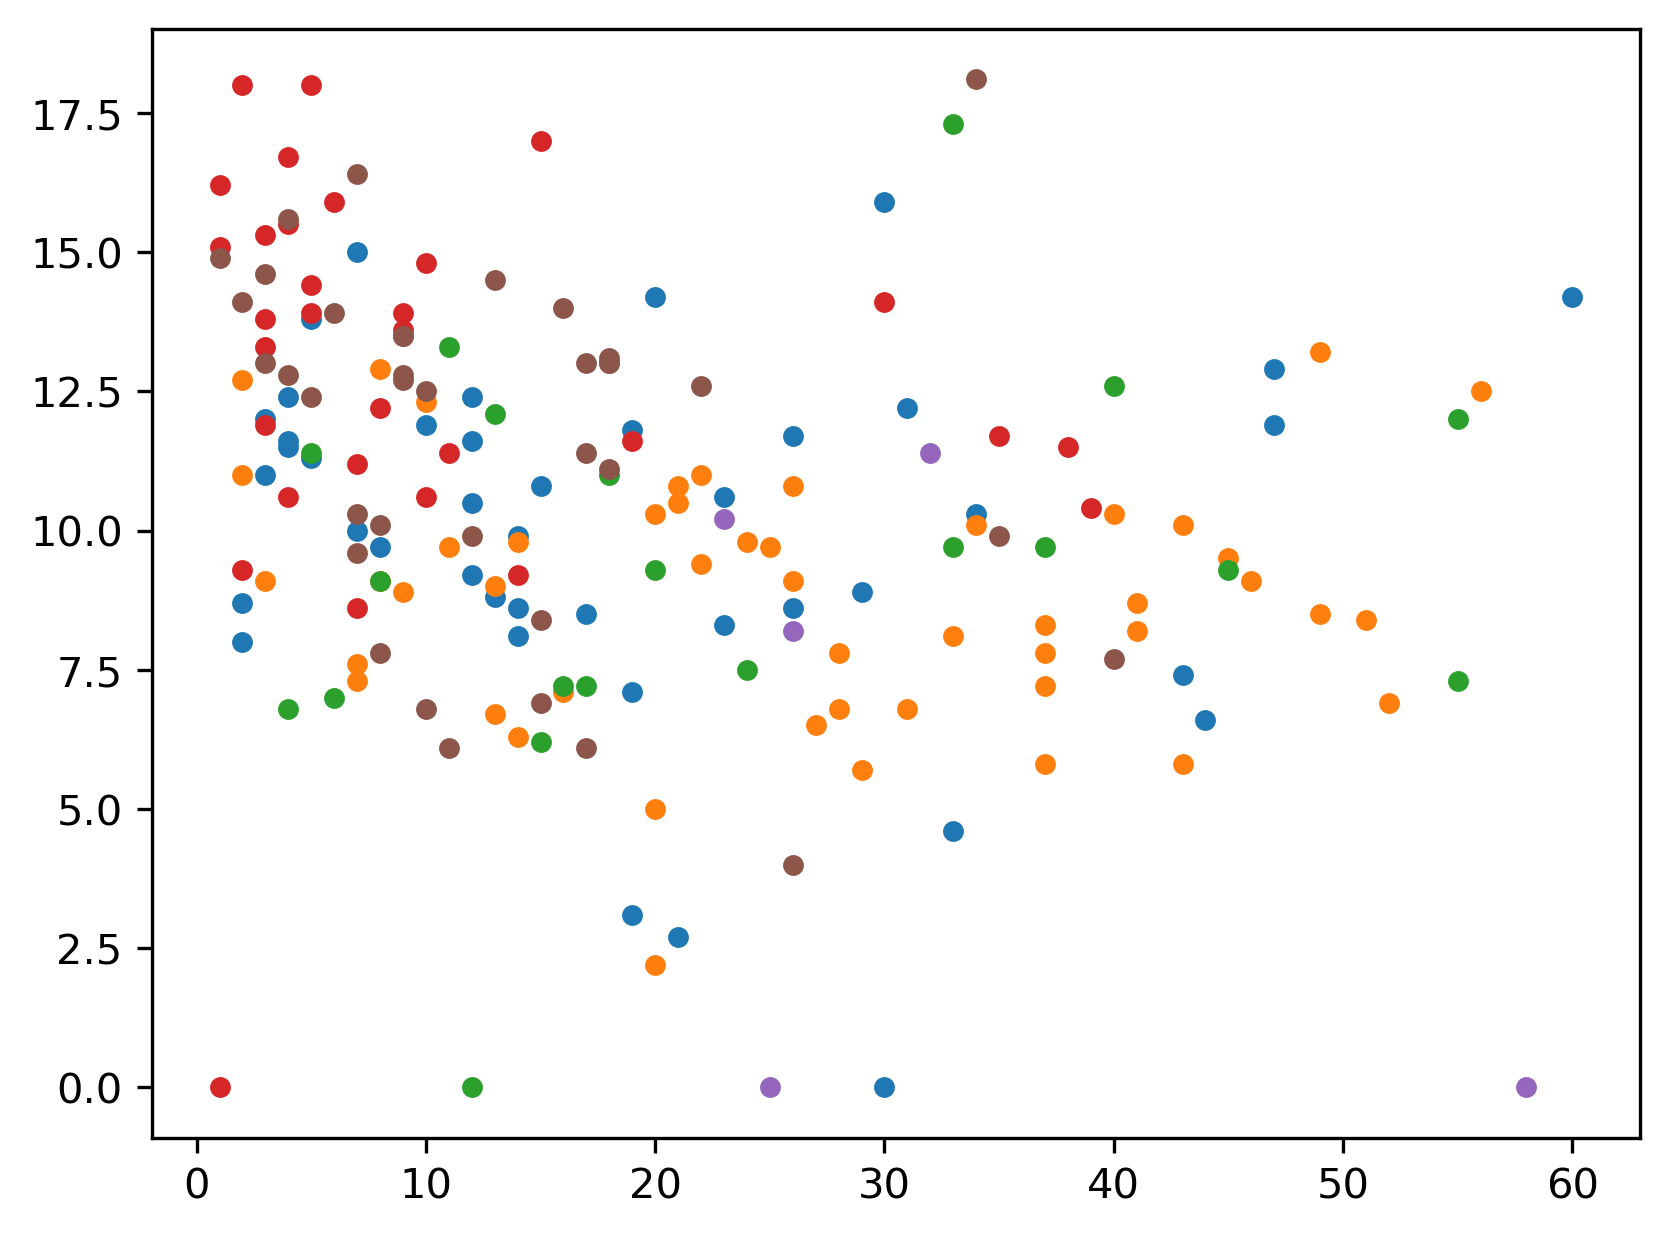

In [78]:
plt.show()

first draft picks all of them for 20 years, get average in their first year

if there is a huge variance and no trend then talk about the variance